# Prediction of BigMarket Sales

Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

# Data Dictionary

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

# Metadata

# Import The Libraries

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Lets Import the Data set


In [101]:
train_data = pd.read_csv("F:\Predict BigMarket Sales\Train.csv")
test_data  = pd.read_csv("F:\Predict BigMarket Sales\Test.csv")

In [102]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [103]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [104]:
print("rows, column:",  train_data.shape)
print("rows, column:",  test_data.shape)

rows, column: (8523, 12)
rows, column: (5681, 11)


In [105]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [107]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Handling missing values

In [108]:
train_data.isnull().sum().sort_values(ascending = False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling missing values in Outlet_size column

In [109]:
# Group by Outlet_Type and calculate mode Outlet_Size for each category
category_mode = train_data.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0])


# Function to impute missing Outlet_Size based on category
def impute_outlet_size(row):
    if pd.isnull(row['Outlet_Size']):
        return category_mode.get(row['Outlet_Type'], None)
    return row['Outlet_Size']

# Apply the imputation function to the DataFrame
train_data['Outlet_Size'] = train_data.apply(impute_outlet_size, axis=1)



 Now only item_weight column has null values for that I will check the dependency of otem_weight column and Item_Outlet_Sales by correlation of their is no corrleation I will simply drop that whole column.

C:\Users\Admin\AppData\Local\Temp\ipykernel_5968\2987843140.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


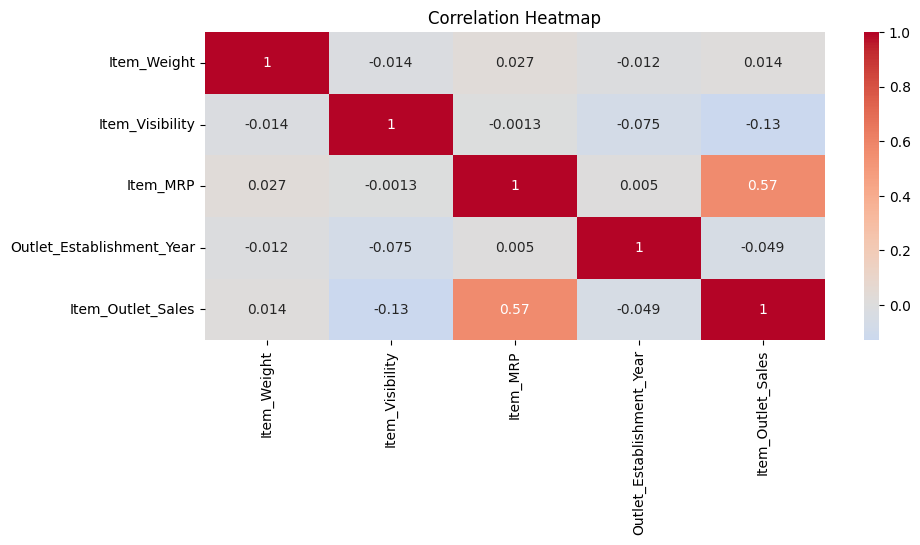

In [110]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

As we can see that their is weak correlation between Item_weight and Item_Outlet_Sales. we can drop that Item_weight Column.

In [111]:
# Drop the 'Item_Weight ' column
train_data.drop('Item_Weight', axis=1, inplace=True)

Now our train dataset does not have any null values. We will now apply same procedure for the test dataset to remove null values
from the data.

In [112]:
test_data.isnull().sum().sort_values(ascending = False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [113]:
# Group by Outlet_Type and calculate mode Outlet_Size for each category
category_mode = test_data.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0])


# Function to impute missing Outlet_Size based on category
def impute_outlet_size(row):
    if pd.isnull(row['Outlet_Size']):
        return category_mode.get(row['Outlet_Type'], None)
    return row['Outlet_Size']

# Apply the imputation function to the DataFrame
test_data['Outlet_Size'] = test_data.apply(impute_outlet_size, axis=1)


In [114]:
# Drop the 'Item_Weight ' column
test_data.drop('Item_Weight', axis=1, inplace=True)

Now both the dataset 'train_data' and 'test_data' does not have missing values

In [115]:
print("rows, column:",  train_data.shape)
print("rows, column:",  test_data.shape)

rows, column: (8523, 11)
rows, column: (5681, 10)


# Now we will do some Exploratory Data Analysis


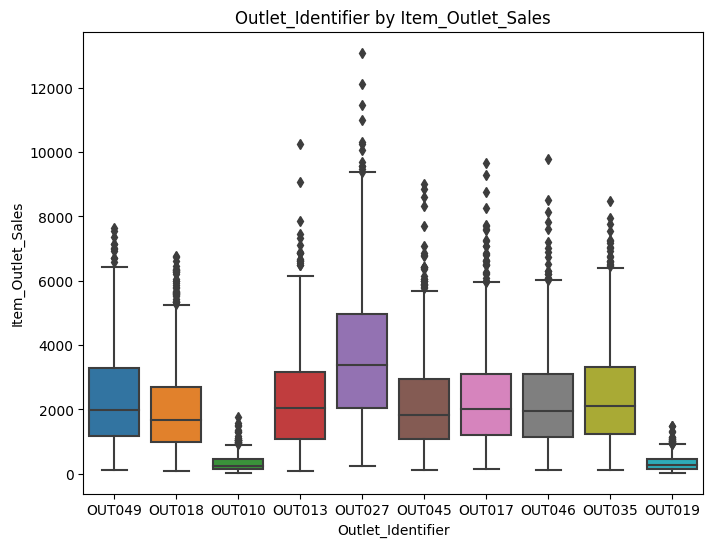

In [116]:
# Create a box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Outlet_Identifier by Item_Outlet_Sales')
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.show()

From the above boxplots we can see that Outlet_10 and Outlet_19 has less contributed to the Total sales

# Handling the Outliers on train as well as test data

In [117]:
float_col = list(train_data.select_dtypes(['float64']).columns)
float_col

['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [118]:
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        try:
            train_data[column] = train_data[column].astype('int64')
        except ValueError:
            pass 

In [119]:
int_col = list(train_data.select_dtypes(['int64']).columns)
int_col

['Outlet_Establishment_Year']

In [120]:
obj_col = list(train_data.select_dtypes(['object']).columns)
obj_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

# Checking Outliers in float columns

In [121]:
for i in float_col:
    Q3, Q1 = np.percentile(train_data[i], [75 ,25])
    iqr= Q3 - Q1
    low = Q1 - (1.5*iqr)
    high = Q3 + (1.5*iqr)
    x=train_data[i][train_data[i]>high]
    y=train_data[i][train_data[i]<low]
    print(i,'has ===>  ',x.shape[0]+y.shape[0],'outliers')

Item_Visibility has ===>   144 outliers
Item_MRP has ===>   0 outliers
Item_Outlet_Sales has ===>   186 outliers


In [122]:
for i in float_col:
    Q3, Q1 = np.percentile(train_data[i], [75 ,25])
    iqr= Q3 - Q1
    low = Q1 - (1.5*iqr)
    high = Q3 + (1.5*iqr)
    print(low,high)
    print(iqr)

-0.07440424500000001 0.195979015
0.067595815
-43.8993 323.3695
91.8172
-2566.3261 6501.8699
2267.049


In [123]:
train_data['Item_Visibility'].quantile(.75)

0.0945852925

In [124]:
train_data['Item_Outlet_Sales'].quantile(.75)

3101.2964

In [125]:
outlier_1=['Item_Visibility','Item_Outlet_Sales']

In [126]:
p0_ = []
p100_ = []
iqr_ = []
high_ = []
low_ = []

for i in outlier_1:
    p0 =train_data[i].min()
    p100=train_data[i].max()
    
    p0_.append(p0)
    p100_.append(p100)

    q1=train_data[i].quantile(0.25)
    q2=train_data[i].quantile(0.5)
    q3=train_data[i].quantile(0.75)
    
    iqr=q3-q1
    iqr_.append(iqr)
    
    low: int = q1 - (1.5 * iqr)
    high: int = q3 + (1.5 * iqr)
    
    low_.append(low)
    high_.append(high)


In [127]:
count = 0

for i in outlier_1:
    train_data[i] = train_data[i].clip(upper = high_[count], lower = low_[count])
    count+=1

In [128]:
for i in outlier_1:
    Q3, Q1 = np.percentile(train_data[i], [75 ,25])
    iqr= Q3 - Q1
    low = Q1 - (1.5*iqr)
    high = Q3 + (1.5*iqr)
    x=train_data[i][train_data[i]>high]
    y=train_data[i][train_data[i]<low]
    print(i,'has ===>  ',x.shape[0]+y.shape[0],'outliers')

Item_Visibility has ===>   0 outliers
Item_Outlet_Sales has ===>   0 outliers


So we Have succefully removed ouliers from float datatype columns now we do same for object and int64 columns

In [129]:
for i in int_col:
    Q3, Q1 = np.percentile(train_data[i], [75 ,25])
    iqr= Q3 - Q1
    low = Q1 - (1.5*iqr)
    high = Q3 + (1.5*iqr)
    x=train_data[i][train_data[i]>high]
    y=train_data[i][train_data[i]<low]
    print(i,'has ===>  ',x.shape[0]+y.shape[0],'outliers')

Outlet_Establishment_Year has ===>   0 outliers


In [130]:
train_data['Item_Visibility'].describe()

count    8523.000000
mean        0.065307
std         0.048841
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.195979
Name: Item_Visibility, dtype: float64

As we can see  that the Fat_content name are occured as 'LF and Reg' which we need to replace by LF:- Low Fat and Reg:- Regular

In [131]:
#Change categories of low fat:
print('Original Categories:')
print(train_data['Item_Fat_Content'].value_counts())

train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print('\nModified Categories:')
print(train_data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


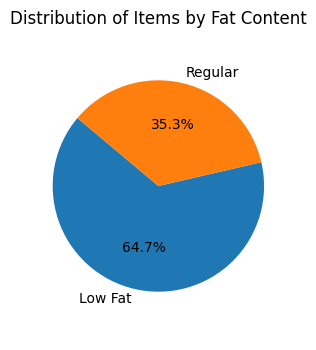

In [132]:


# Count the occurrences of each fat content
fat_content_counts = train_data['Item_Fat_Content'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 4))  # Set the figure size
plt.pie(fat_content_counts, labels=fat_content_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Items by Fat Content')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

Item_by_fatContent is diveide in  t parts Low fat having 64.7% and Regular having 35.3%

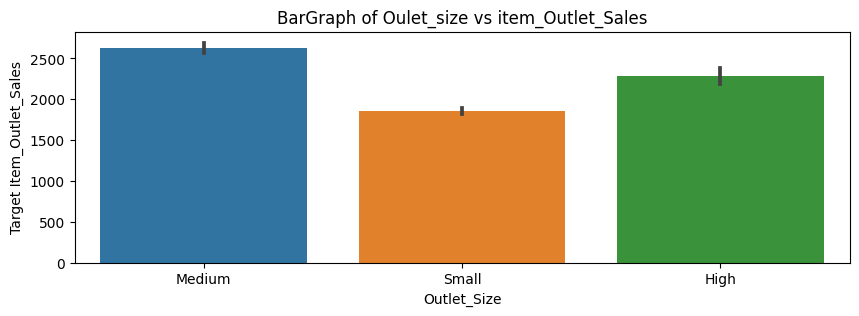

In [133]:
# Create a box plot
plt.figure(figsize=(10, 3))
sns.barplot(data=train_data, x='Outlet_Size', y='Item_Outlet_Sales')
plt.xlabel('Outlet_Size')
plt.ylabel('Target Item_Outlet_Sales')
plt.title('BarGraph of Oulet_size vs item_Outlet_Sales')
plt.show()

In [134]:
train_data.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.065307,140.992782,1997.831867,2156.313016
std,0.048841,62.275067,8.371760,1624.863069
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.195979,266.888400,2009.000000,6501.869900


As we can see the min value of the Item_visibility is zero which is not possible or
due to some error so we need to impute this value by mean value

In [135]:
# Calculate the mean excluding zero values
mean_value = train_data[train_data['Item_Visibility'] != 0]['Item_Visibility'].mean()

# Replace zero values with the mean
train_data['Item_Visibility'] = train_data['Item_Visibility'].replace(0, mean_value)

train_data.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.069603,140.992782,1997.831867,2156.313016
std,0.045879,62.275067,8.371760,1624.863069
min,0.003575,31.290000,1985.000000,33.290000
25%,0.033085,93.826500,1987.000000,834.247400
50%,0.062517,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.195979,266.888400,2009.000000,6501.869900


we will do this also on test data set

In [136]:
# Calculate the mean excluding zero values
mean_value = test_data[test_data['Item_Visibility'] != 0]['Item_Visibility'].mean()

# Replace zero values with the mean
test_data['Item_Visibility'] = test_data['Item_Visibility'].replace(0, mean_value)

test_data.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000
mean,0.070036,141.023273,1997.828903
std,0.048383,61.809091,8.372256
min,0.003591,31.990000,1985.000000
25%,0.033208,94.412000,1987.000000
50%,0.062137,141.415400,1999.000000
75%,0.093463,186.026600,2004.000000
max,0.323637,266.588400,2009.000000


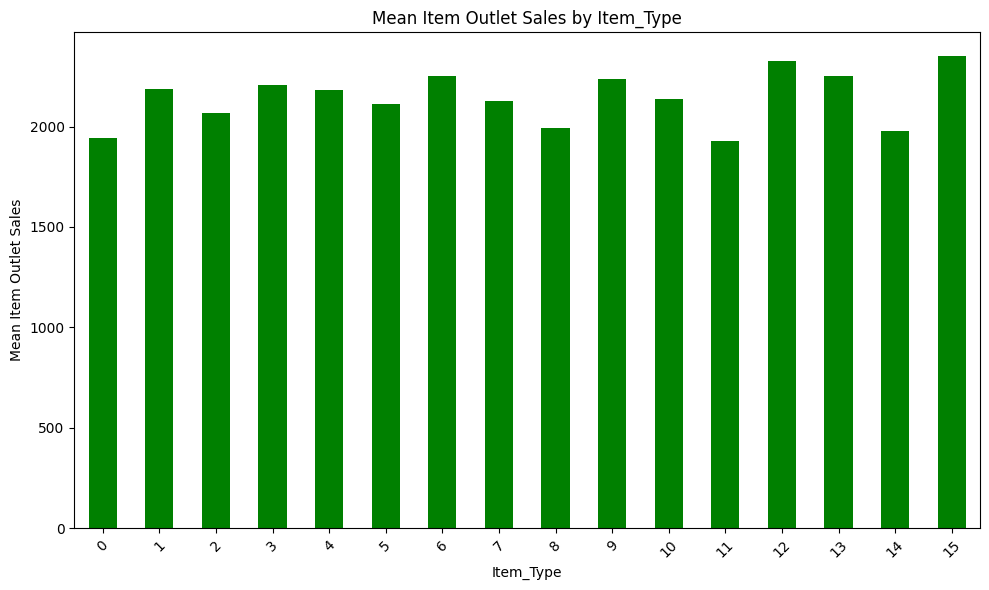

In [281]:
# Group data by 'Item_Type' and calculate the mean of 'Item_Outlet_Sales'
item_type_sales_mean = train_data.groupby('Item_Type')['Item_Outlet_Sales'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
item_type_sales_mean.plot(kind='bar', color='green')
plt.xlabel('Item_Type')
plt.ylabel('Mean Item Outlet Sales')
plt.title('Mean Item Outlet Sales by Item_Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

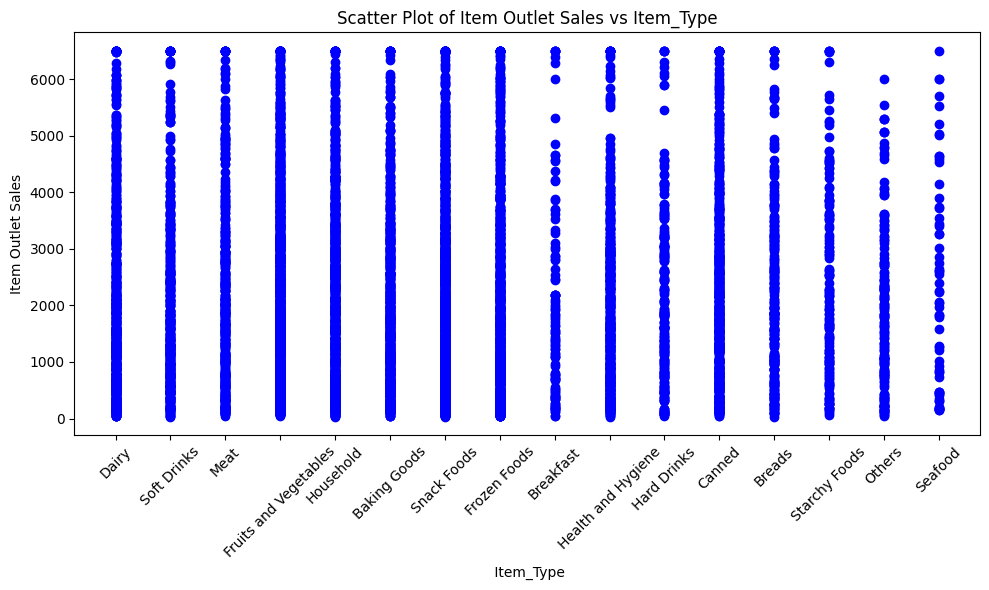

In [137]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Item_Type'], train_data['Item_Outlet_Sales'], color='blue')
plt.xlabel(' Item_Type')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot of Item Outlet Sales vs Item_Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

Among all the Item_Type 'Fruits and Vegetables' and 'Household' items are being most sold

In [138]:
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


# Label Encoding for categorical variables on train data and then test data as well

In [139]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for column in train_data.select_dtypes(include=['object', 'category']).columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])


In [140]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for column in test_data.select_dtypes(include=['object', 'category']).columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])


In [141]:
train_data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,1,0.069603,6,182.0950,0,1998,2,2,0,732.3800
4,1297,0,0.069603,9,53.8614,1,1987,0,2,1,994.7052


In [142]:
test_data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,4,0.038428,4,87.3198,2,2007,2,1,1
2,1406,1,0.099575,11,241.7538,0,1998,2,2,0
3,809,1,0.015388,13,155.0340,2,2007,2,1,1
4,1184,2,0.118599,4,234.2300,5,1985,1,2,3


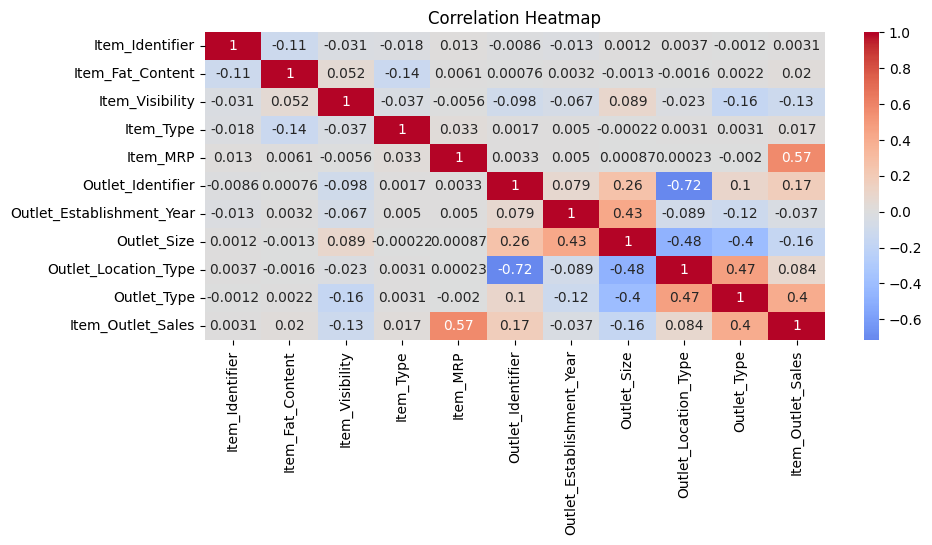

In [143]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [144]:
numerical_corr = train_data.iloc[:, 1:].select_dtypes(exclude=['object']).corr()
print (numerical_corr['Item_Outlet_Sales'].sort_values(axis=0,ascending=False).iloc[1:11])

Item_MRP                     0.574554
Outlet_Type                  0.399640
Outlet_Identifier            0.169321
Outlet_Location_Type         0.083727
Item_Fat_Content             0.019675
Item_Type                    0.017388
Outlet_Establishment_Year   -0.037133
Item_Visibility             -0.125984
Outlet_Size                 -0.164868
Name: Item_Outlet_Sales, dtype: float64


# Split the data into all the independent variables as x and dependent variable as y


In [198]:
x_train = train_data[['Item_MRP','Outlet_Type','Outlet_Identifier','Item_Visibility','Outlet_Size']].values
y_train = train_data.iloc[ : , -1].values

In [199]:
print(x_train)

[[2.50e+02 1.00e+00 9.00e+00 1.60e-02 1.00e+00]
 [4.83e+01 2.00e+00 3.00e+00 1.93e-02 1.00e+00]
 [1.42e+02 1.00e+00 9.00e+00 1.68e-02 1.00e+00]
 ...
 [8.51e+01 1.00e+00 6.00e+00 3.52e-02 2.00e+00]
 [1.03e+02 2.00e+00 3.00e+00 1.45e-01 1.00e+00]
 [7.55e+01 1.00e+00 8.00e+00 4.49e-02 2.00e+00]]


In [200]:
print(y_train)

[3735.14  443.42 2097.27 ... 1193.11 1845.6   765.67]


# Split the training dataset again for prediction and model evaluation

In [230]:
from sklearn.model_selection import train_test_split, GridSearchCV
x1_train, x1_test, y1_train, y1_test = train_test_split (x_train, y_train, test_size=0.2, random_state=1)

# Now we perform some regression models 

# Multiple Linear Regression Model

In [256]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x1_train, y1_train)

LinearRegression()

Predicting the test Results

In [203]:
# Make predictions on the test set
y1_pred = regressor.predict(x1_test)
np.set_printoptions(precision=2)
print(y1_pred)

[ 571.32 1859.2  3034.44 ... 2362.02 2187.98 2038.18]


# Polynomial Regression

In [204]:
# Transform the features into polynomial features
from sklearn.preprocessing import PolynomialFeatures
degree = 3  # Change this to the degree of polynomial you want
poly = PolynomialFeatures(degree=degree)
x1_train_poly = poly.fit_transform(x1_train)
x1_test_poly = poly.transform(x1_test)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(x1_train_poly, y1_train)

# Make predictions on the test set
y1_pred_poly = model.predict(x1_test_poly)

In [205]:
print(y1_pred_poly)

[ 535.39 1213.48 3125.46 ... 2760.21 1497.73 2461.61]


# Decision Tree

In [206]:
from sklearn.tree import DecisionTreeRegressor
regressor_d = DecisionTreeRegressor()
regressor_d.fit(x1_train ,y1_train)


DecisionTreeRegressor()

In [207]:
y1_pred_decision = regressor_d.predict(x1_test)
np.set_printoptions(precision=2)
print(y1_pred_decision)

[ 493.36 1406.17 3870.96 ... 2137.88  717.73  288.96]


# Random Forest (hyperparameter tunning)

In [243]:
from sklearn.ensemble import RandomForestRegressor
regressor_R = RandomForestRegressor()
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(regressor_R, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit( x1_train, y1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [245]:
# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_


In [246]:
print("Best hyperparameters:", best_params)
print("RMSE on test set:", rmse_ran)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
RMSE on test set: 1048.7087753880971


# Show the predictions of every model

In [248]:
predictions_df = pd.DataFrame({
    'MultipleLinearRegression': y1_pred.flatten(),
    'PolynomialFeatures' :y1_pred_poly.flatten(),
    'DecisionTree': y1_pred_decision.flatten(),
    'RandomForest': y1_pred_random_forest1.flatten()
})

In [249]:
print(predictions_df)

      MultipleLinearRegression  PolynomialFeatures  DecisionTree  RandomForest
0                   571.319086          535.386523      493.3578    575.283406
1                  1859.198698         1213.481591     1406.1696   1299.411698
2                  3034.443837         3125.461356     3870.9612   3368.059336
3                  1374.462433         1467.668443     1298.3100   1402.577010
4                   492.640661          601.272490      639.1680    717.124234
...                        ...                 ...           ...           ...
1700               3032.644593         3082.872761     3874.9560   2956.279352
1701               4389.444266         3448.506752     4857.6768   3622.886954
1702               2362.019011         2760.210445     2137.8838   2645.187950
1703               2187.983610         1497.733388      717.7324   1363.200365
1704               2038.183504         2461.605251      288.9572   2626.264363

[1705 rows x 4 columns]


# Calculate R-sqaured value for each regression model for evaluation

In [257]:
from sklearn.metrics import r2_score
r2_multiple = r2_score( y1_test , y1_pred)
print("R-squared for Multiple Linear Regression:",r2_multiple)

R-squared for Multiple Linear Regression: 0.5069049877481504


In [258]:
from sklearn.metrics import r2_score
r2_poly = r2_score( y1_test , y1_pred_poly)
print("R-squared Polynomial Regression:",r2_poly)

R-squared Polynomial Regression: 0.6119925358837941


In [259]:
from sklearn.metrics import r2_score
r2_decision = r2_score( y1_test , y1_pred_decision)
print("R-squared Decision Tree Regession:",r2_decision)

R-squared Decision Tree Regession: 0.2353424954941412


In [260]:
from sklearn.metrics import r2_score
r2_random_forest2 = r2_score( y1_test , y1_pred_random_forest1)
print("R-squared Random Forest Regression:",r2_random_forest2)

R-squared Random Forest Regression: 0.5964187657051223


# Show the R-sqaured values for each regresssion model in dscending order for evaluation

In [251]:
models = pd.DataFrame({
    'Models': [ 'MultipleLinearRegression','PolynomialFeatures', 'DecisionTree','RandomForest' ],
    'R-Sqaured value': [r2_multiple,r2_poly,r2_decision,r2_random_forest2],
      })
models.sort_values(by='R-Sqaured value', ascending=False)

,Models,R-Sqaured value
1,PolynomialFeatures,0.611993
3,RandomForest,0.596419
0,MultipleLinearRegression,0.506905
2,DecisionTree,0.235342


# Calculate Adjusted R-sqaured for each regression model

In [261]:
# Number of observations
n = len(y1_test)

# Number of predictor variables (independent variables)
k = 5  # Adjust this value based on your model

# Calculate adjusted R2 using statsmodels
adjusted_r2_multiple = 1 - (1 - r2_multiple) * (n - 1) / (n - k - 1)

print(f'Adjusted R2 Score for Multiple Regression: {adjusted_r2_multiple:.4f}')

Adjusted R2 Score for Multiple Regression: 0.5055


In [262]:
# Number of observations
n = len(y1_test)

# Number of predictor variables (independent variables)
k = 5  # Adjust this value based on your model

# Calculate adjusted R2 using statsmodels
adjusted_r2_poly = 1 - (1 - r2_poly) * (n - 1) / (n - k - 1)

print(f'Adjusted R2 Score for Polynomial Regression: {adjusted_r2_poly:.4f}')

Adjusted R2 Score for Polynomial Regression: 0.6109


In [263]:
# Number of observations
n = len(y1_test)

# Number of predictor variables (independent variables)
k = 5 # Adjust this value based on your model

# Calculate adjusted R2 using statsmodels
adjusted_r2_decision = 1 - (1 - r2_decision) * (n - 1) / (n - k - 1)

print(f'Adjusted R2 Score for Decision Tree Regression: {adjusted_r2_decision:.4f}')

Adjusted R2 Score for Decision Tree Regression: 0.2331


In [265]:
# Number of observations
n = len(y1_test)

# Number of predictor variables (independent variables)
k = 5  # Adjust this value based on your model

# Calculate adjusted R2 using statsmodels
adjusted_r2_random_forest2 = 1 - (1 - r2_random_forest2) * (n - 1) / (n - k - 1)

print(f'Adjusted R2 Score for Random Forest Regression: {adjusted_r2_random_forest2:.4f}')

Adjusted R2 Score for Random Forest Regression: 0.5952


# Show the Adj-R-Sqaured value for each regression model in dscending order

In [266]:
models_2 = pd.DataFrame({
    'Models': [ 'MultipleLinearRegression','PolynomialFeatures', 'DecisionTree','RandomForest' ],
    'Adjusted R-Sqaured value': [adjusted_r2_multiple,adjusted_r2_poly,adjusted_r2_decision,adjusted_r2_random_forest2],
      })
models_2.sort_values(by='Adjusted R-Sqaured value', ascending=False)

,Models,Adjusted R-Sqaured value
1,PolynomialFeatures,0.610851
3,RandomForest,0.595231
0,MultipleLinearRegression,0.505454
2,DecisionTree,0.233092


# Calculate RMSE value for each regression model 

In [267]:
mse_value_multiple = mean_squared_error(y1_test , y1_pred)
rmse_value_multiple = np.sqrt(mse_value_multiple)
print("RMSE for Multiple Regression:", rmse_value_multiple)

RMSE for Multiple Regression: 1159.1902638271847


In [268]:
mse_value_poly = mean_squared_error(y1_test , y1_pred_poly)
rmse_value_poly = np.sqrt(mse_value_poly)
print("RMSE for Polynomial Regression:", rmse_value_poly)

RMSE for Polynomial Regression: 1028.275433249655


In [269]:
mse_value_decision = mean_squared_error(y1_test , y1_pred_decision)
rmse_value_decision = np.sqrt(mse_value_decision)
print("RMSE for DecisionTree Regression:", rmse_value_decision)

RMSE for DecisionTree Regression: 1443.5203062903608


In [270]:
mse_value_random_forest = mean_squared_error(y1_test , y1_pred_random_forest1)
rmse_value_random_forest = np.sqrt(mse_value_random_forest)
print("RMSE for Random Forest:", rmse_value_random_forest)

RMSE for Random Forest: 1048.7087753880971


# Show RMSE values for each regression model in dscending order

In [271]:
models_3 = pd.DataFrame({
    'Models': [ 'MultipleLinearRegression','PolynomialFeatures', 'DecisionTree','RandomForest' ],
    'RMSE value': [rmse_value_multiple,rmse_value_poly,rmse_value_decision,rmse_value_random_forest],
      })
models_3.sort_values(by='RMSE value', ascending=False)

,Models,RMSE value
2,DecisionTree,1443.520306
0,MultipleLinearRegression,1159.190264
3,RandomForest,1048.708775
1,PolynomialFeatures,1028.275433


# So My conclusion is among all the regression model performed so far Polynomial Regression gives the best model So we predict the test data on Polynomial Regression

In [272]:
test_data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,4,0.038428,4,87.3198,2,2007,2,1,1
2,1406,1,0.099575,11,241.7538,0,1998,2,2,0
3,809,1,0.015388,13,155.0340,2,2007,2,1,1
4,1184,2,0.118599,4,234.2300,5,1985,1,2,3


In [ ]:
# Transform the features into polynomial features
from sklearn.preprocessing import PolynomialFeatures
degree = 3  # Change this to the degree of polynomial you want
poly = PolynomialFeatures(degree=degree)
x1_train_poly = poly.fit_transform(x1_train)
x1_test_poly = poly.transform(x1_test)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(x1_train_poly, y1_train)

# Make predictions on the test set
y1_pred_poly = model.predict(x1_test_poly)

In [274]:
test_data_pred = test_data[['Item_MRP','Outlet_Type','Outlet_Identifier','Item_Visibility','Outlet_Size']].values

In [279]:
test_data_poly=poly.transform(test_data_pred)
# Make predictions on the test set
y1_pred_poly_test_data = model.predict(test_data_poly)
print('predicted values on test data:',y1_pred_poly_test_data)

predicted values on test data: [1756.87 1435.59  656.78 ... 1840.56 3567.13 1188.51]


In [223]:
excel_filename = 'combined_predictions.xlsx'
predictions_df.to_excel(excel_filename, index=False)

print(f"Combined predictions saved to {excel_filename}")

Combined predictions saved to combined_predictions.xlsx
